<a href="https://colab.research.google.com/github/haxamanesh/PCA-and-Clustering-Online-shop-shoppers/blob/main/Online_Shopping_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])

# Print the DataFrame


Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


In [4]:
df1 = df.drop(["Revenue"], axis=1)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [74]:
df["Revenue"].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [5]:
df1.info(); df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

(12330, 17)

In [6]:
df1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [8]:
df1.duplicated().sum()

125

In [9]:
df1.drop_duplicates(inplace=True)
print(df1.shape)
print(df1.duplicated().sum())

(12205, 17)
0


In [10]:
objects = df1.select_dtypes(include=['object']).columns
bools = df1.select_dtypes(include=['bool']).columns
num = df1.select_dtypes(exclude = ['object','bool'] ).columns
print("objects:",objects)
print("num:",num)
print("bools:",bools)


objects: Index(['Month', 'VisitorType'], dtype='object')
num: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')
bools: Index(['Weekend'], dtype='object')


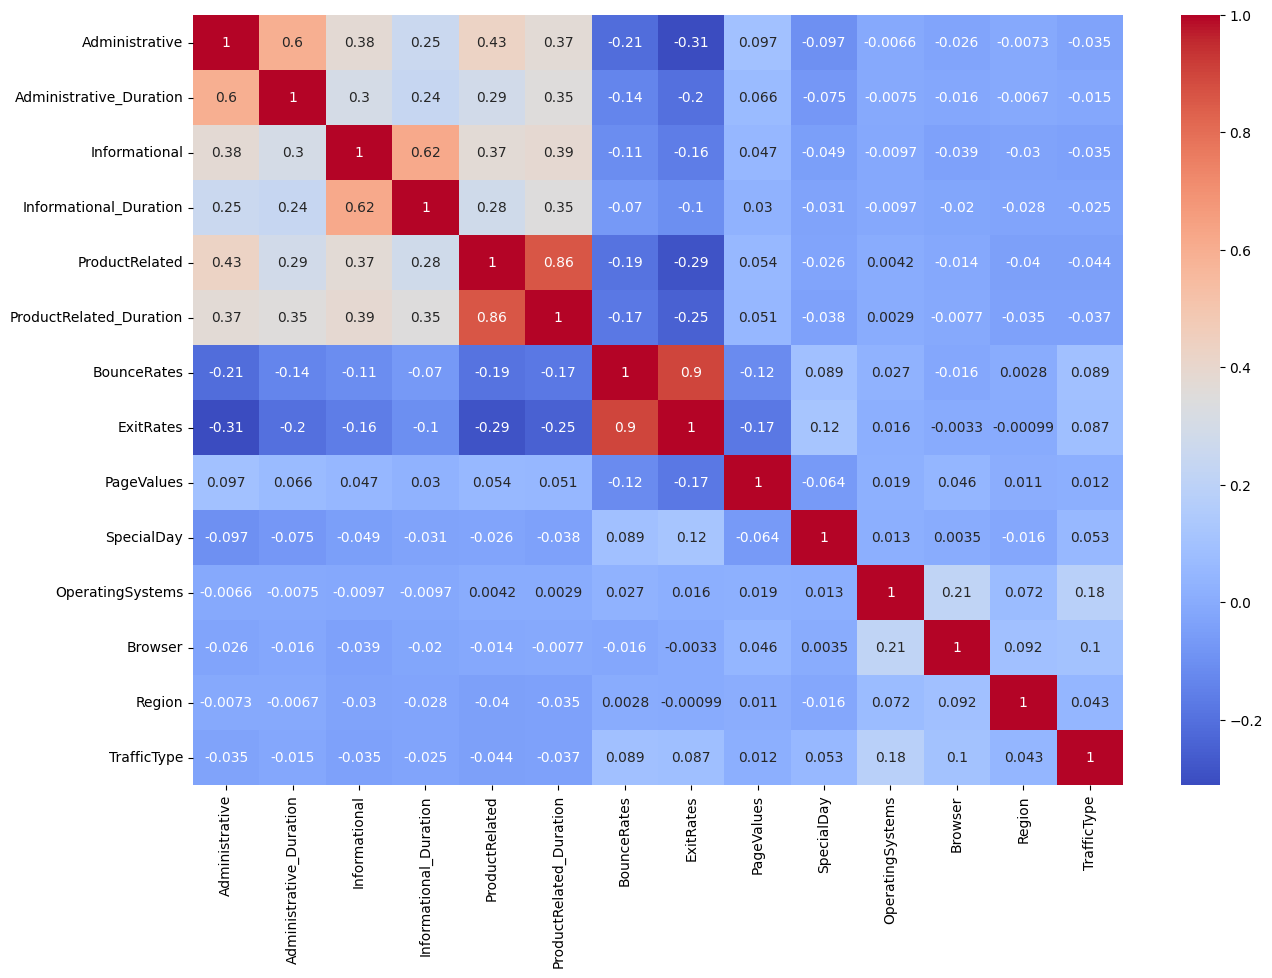

In [11]:
# Create a heatmap for the numeric columns
plt.figure(figsize=(15, 10))
sns.heatmap(df1[num].corr(), annot=True, cmap="coolwarm")
plt.show()


In [12]:
for col in objects:
  print(df1[col].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']


In [13]:
for col in objects:
   preprocessor2 = LabelEncoder()
   df1[col] = preprocessor2.fit_transform(df1[col])

df2 = pd.DataFrame(df1)
df2.head();df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [14]:
for col in bools:
   preprocessor3 = LabelEncoder()
   df2[col] = preprocessor3.fit_transform(df2[col])
df3 = pd.DataFrame(df2)
df3.head(); df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [15]:
preprocessor5 = StandardScaler()

df4 = preprocessor5.fit_transform(df3)
df4 = pd.DataFrame(df4, columns = df3.columns)
df4.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,-1.334491,-1.239776,-0.794017,-0.896370,-0.765321,0.40967,-0.553088
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,-1.334491,-0.136980,-0.209237,-0.896370,-0.516347,0.40967,-0.553088
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,-1.334491,2.068612,-0.794017,2.433853,-0.267374,0.40967,-0.553088
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,-1.334491,0.965816,-0.209237,-0.480092,-0.018400,0.40967,-0.553088
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,-1.334491,0.965816,0.375543,-0.896370,-0.018400,0.40967,1.808031


In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  float64
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  float64
 11  OperatingSystems         12205 non-null  float64
 12  Browser                  12205 non-null  float64
 13  Region                   12205 non-null  float64
 14  TrafficType           

<Figure size 1200x1200 with 0 Axes>

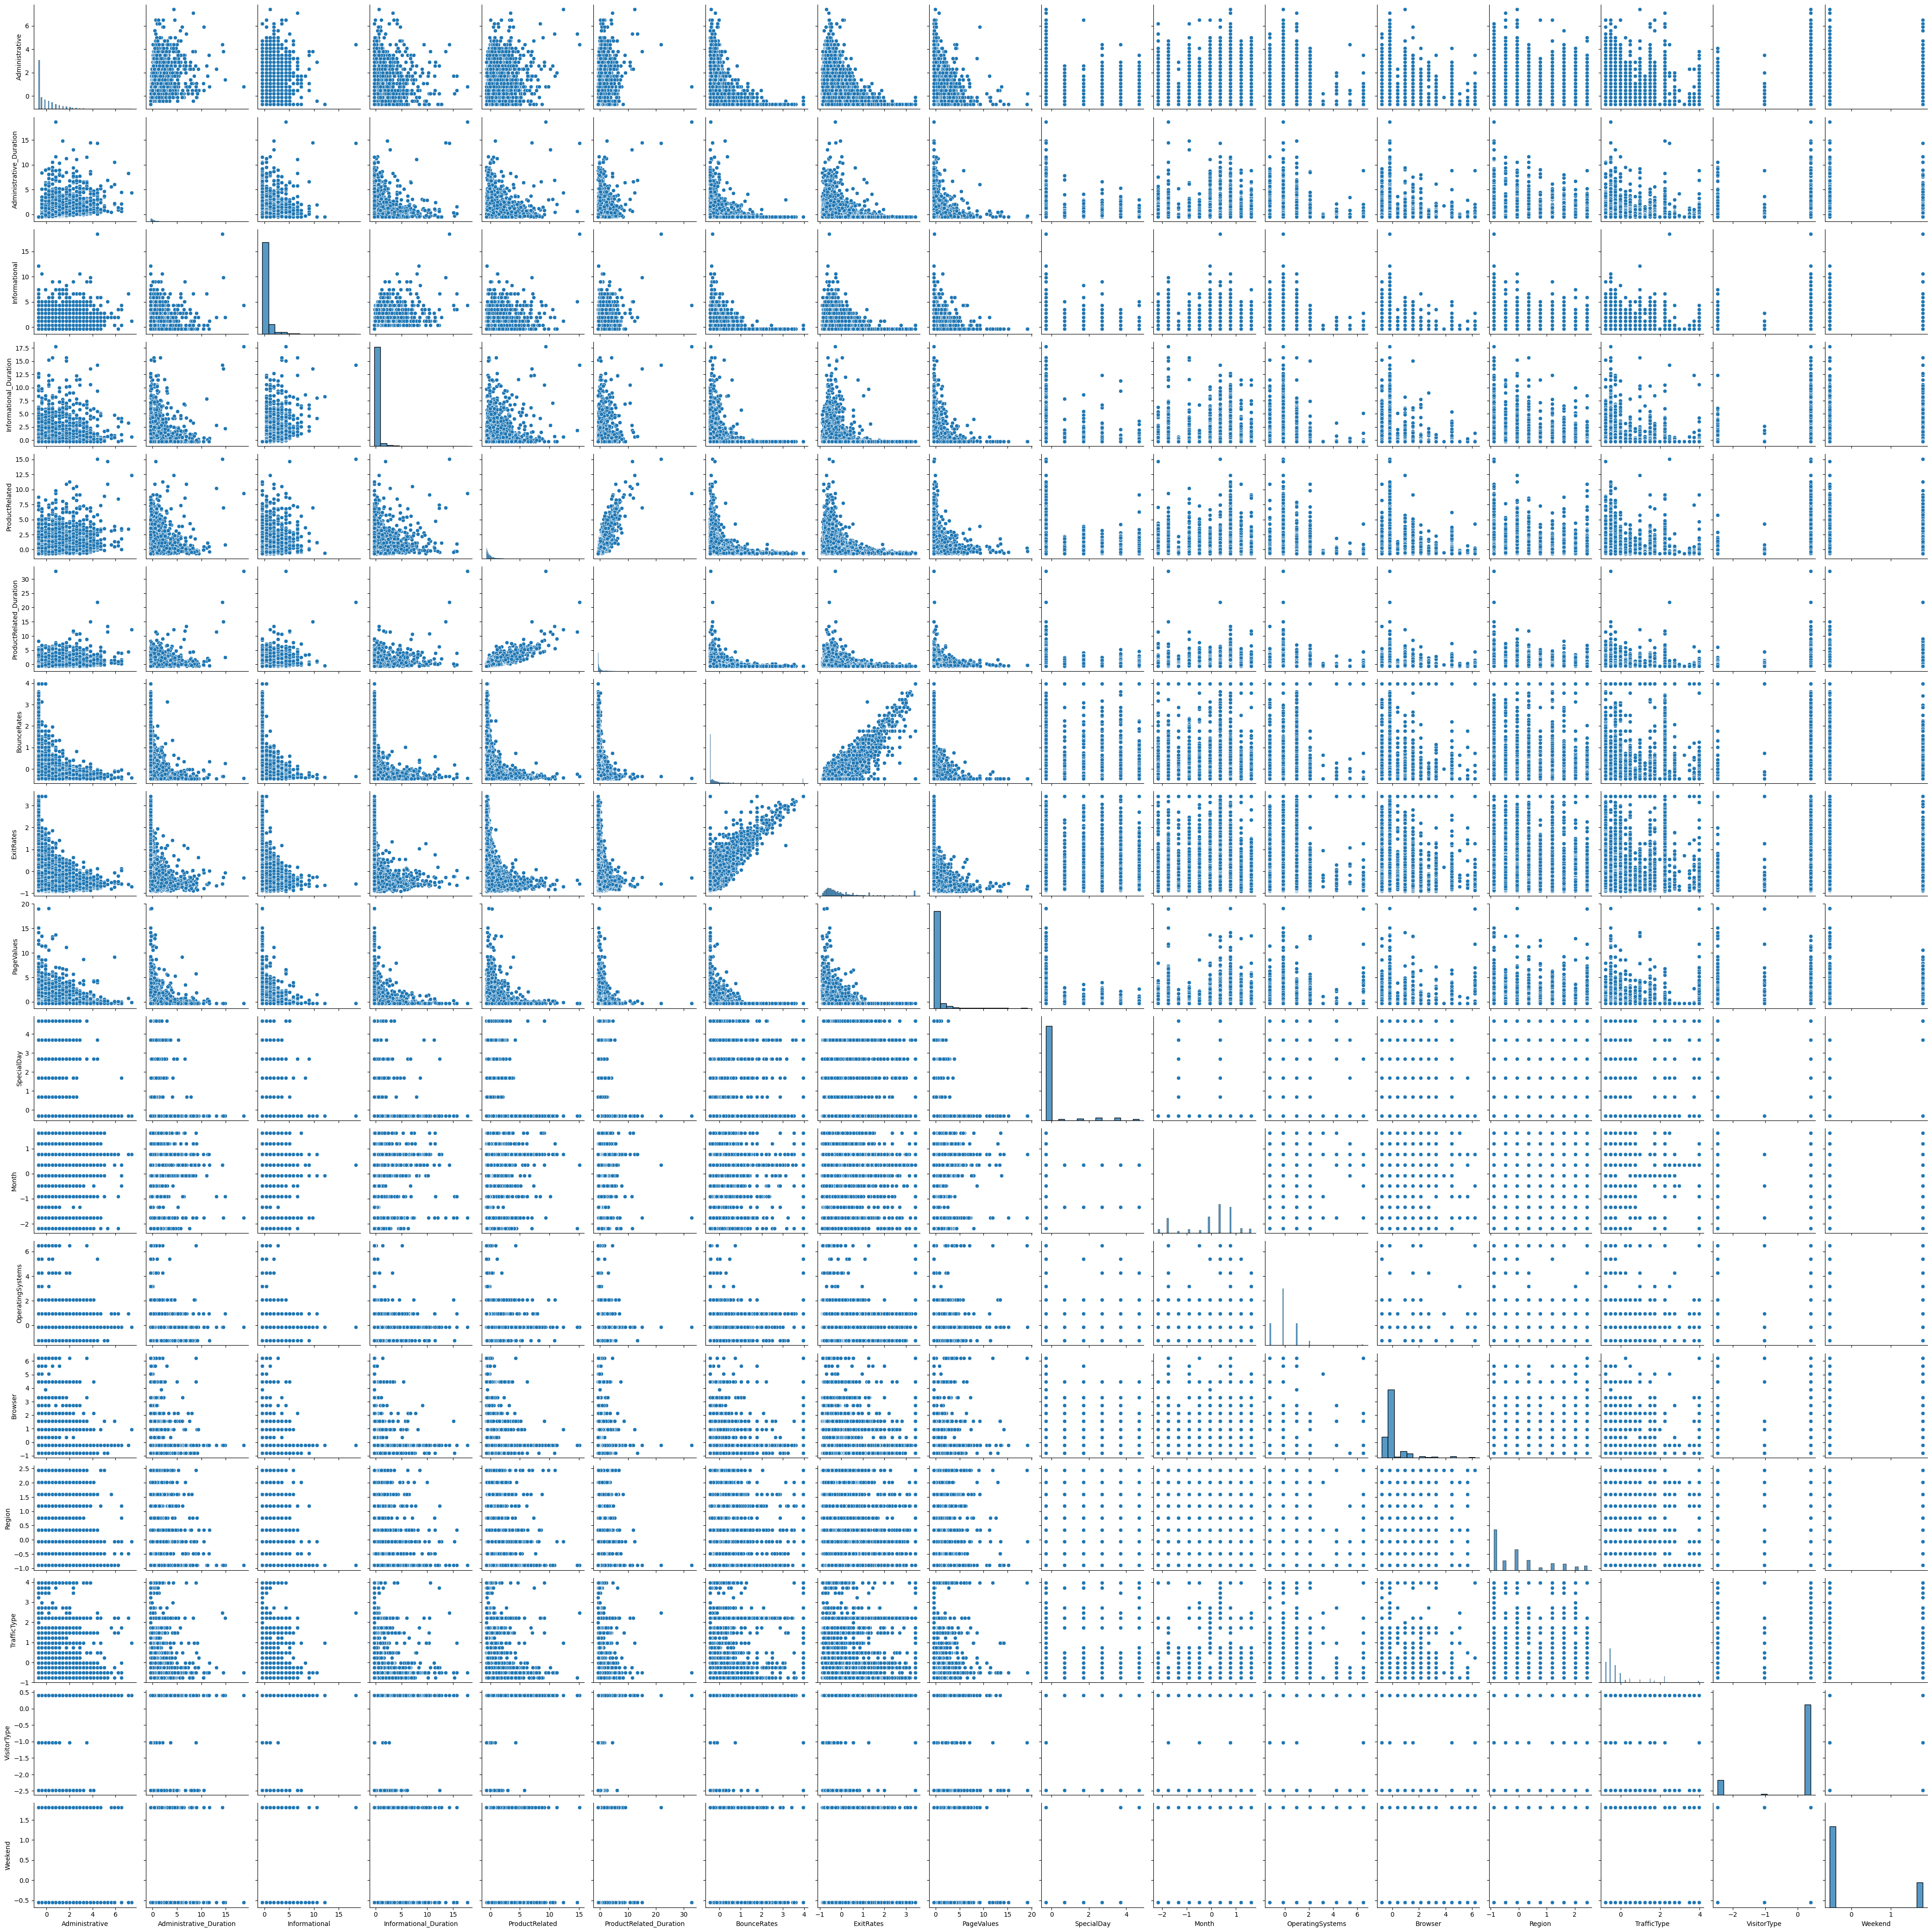

In [17]:
plt.figure(figsize=(12, 12))
sns.pairplot(df4)
plt.show()

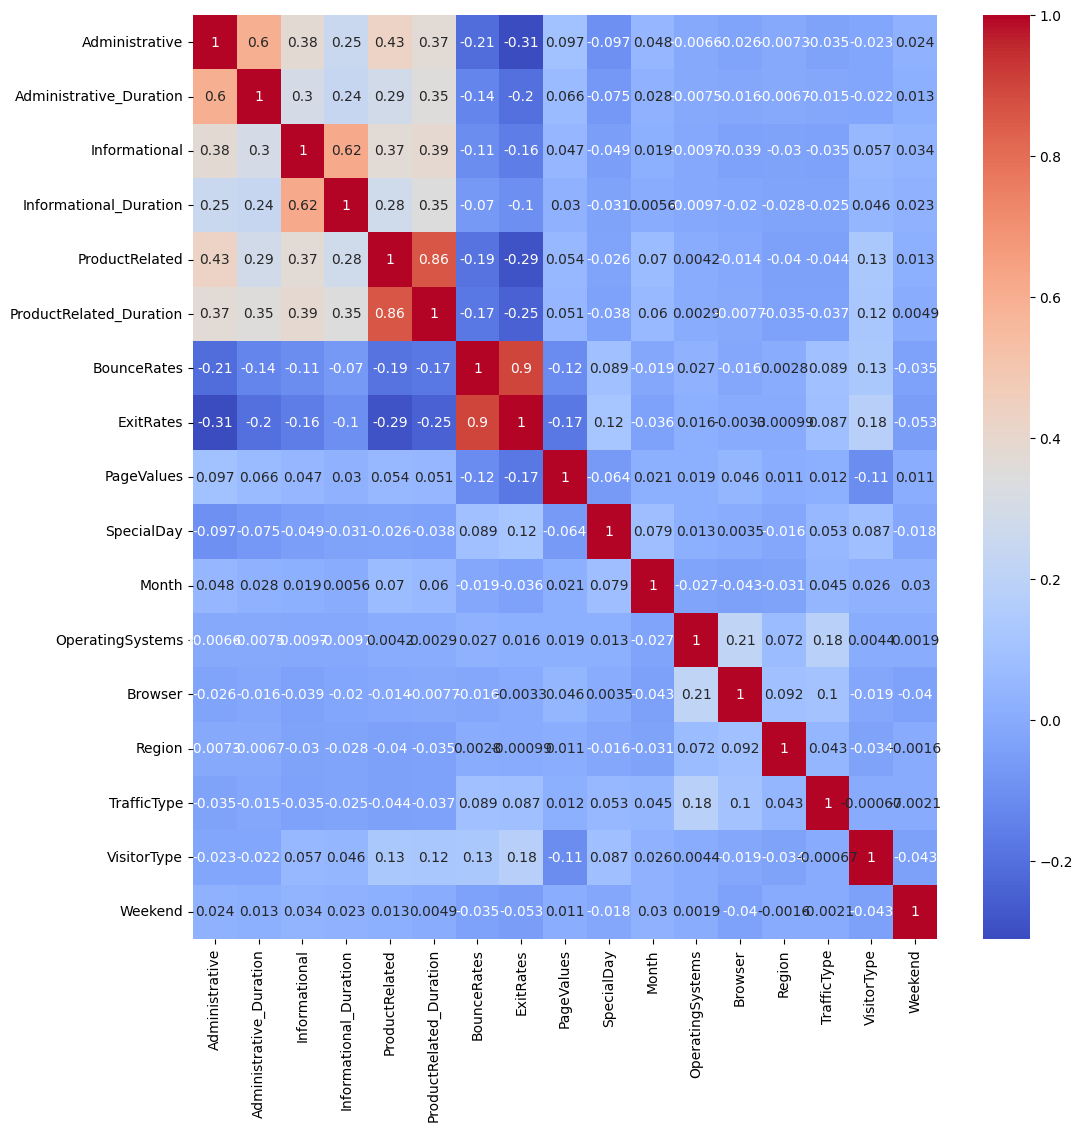

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
print(df4.ExitRates.value_counts())
print(df4.BounceRates.value_counts())
df4.drop(['BounceRates'], axis=1, inplace=True)
df4.head()

ExitRates
 3.434394    585
 1.268054    338
 0.184884    329
-0.176172    291
 0.545941    267
            ... 
-0.425672      1
-0.556279      1
-0.675108      1
-0.583426      1
-0.269384      1
Name: count, Length: 4777, dtype: int64
BounceRates
-0.450137    5518
 3.969402     575
 1.023043     134
 0.181226     115
 0.654748     113
             ... 
 1.301752       1
-0.301581       1
-0.151231       1
 1.194343       1
-0.203770       1
Name: count, Length: 1872, dtype: int64


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.434394,-0.318962,-0.31024,-1.334491,-1.239776,-0.794017,-0.896370,-0.765321,0.40967,-0.553088
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,1.268054,-0.318962,-0.31024,-1.334491,-0.136980,-0.209237,-0.896370,-0.516347,0.40967,-0.553088
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.434394,-0.318962,-0.31024,-1.334491,2.068612,-0.794017,2.433853,-0.267374,0.40967,-0.553088
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,2.134590,-0.318962,-0.31024,-1.334491,0.965816,-0.209237,-0.480092,-0.018400,0.40967,-0.553088
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,0.184884,-0.318962,-0.31024,-1.334491,0.965816,0.375543,-0.896370,-0.018400,0.40967,1.808031


In [19]:
print(df4.ProductRelated.value_counts())
print(df4.ProductRelated_Duration.value_counts())
df4.drop(['ProductRelated'], axis=1, inplace=True)
df4.head()

ProductRelated
-0.696218    504
-0.651367    458
-0.673793    458
-0.628941    404
-0.584090    396
            ... 
 4.730786      1
 8.453442      1
 5.156873      1
 8.565570      1
 3.587078      1
Name: count, Length: 311, dtype: int64
ProductRelated_Duration
-0.628793    630
-0.619937     21
-0.623062     17
-0.624625     17
-0.620979     16
            ... 
-0.126548      1
-0.319598      1
-0.195670      1
-0.148357      1
-0.448540      1
Name: count, Length: 9551, dtype: int64


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.628793,3.434394,-0.318962,-0.31024,-1.334491,-1.239776,-0.794017,-0.896370,-0.765321,0.40967,-0.553088
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.595451,1.268054,-0.318962,-0.31024,-1.334491,-0.136980,-0.209237,-0.896370,-0.516347,0.40967,-0.553088
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.628793,3.434394,-0.318962,-0.31024,-1.334491,2.068612,-0.794017,2.433853,-0.267374,0.40967,-0.553088
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.627404,2.134590,-0.318962,-0.31024,-1.334491,0.965816,-0.209237,-0.480092,-0.018400,0.40967,-0.553088
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.301889,0.184884,-0.318962,-0.31024,-1.334491,0.965816,0.375543,-0.896370,-0.018400,0.40967,1.808031


In [20]:
print(df4.Informational.value_counts())
print(df4.Informational_Duration.value_counts())
df4.drop(['Informational'], axis=1, inplace=True)
df4.head()

Informational
-0.398824     9574
 0.385143     1041
 1.169109      728
 1.953076      380
 2.737043      222
 3.521009       99
 4.304976       78
 5.088943       36
 6.656876       15
 5.872910       14
 7.440843        7
 9.008777        5
 10.576710       2
 12.144643       1
 8.224810        1
 18.416377       1
 9.792743        1
Name: count, dtype: int64
Informational_Duration
-0.246257    9800
-0.182617      33
-0.196759      26
-0.175545      26
-0.203830      26
             ... 
 1.498911       1
 1.691247       1
-0.151503       1
 1.331678       1
 1.247531       1
Name: count, Length: 1258, dtype: int64


,Administrative,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.702302,-0.460019,-0.246257,-0.628793,3.434394,-0.318962,-0.31024,-1.334491,-1.239776,-0.794017,-0.896370,-0.765321,0.40967,-0.553088
1,-0.702302,-0.460019,-0.246257,-0.595451,1.268054,-0.318962,-0.31024,-1.334491,-0.136980,-0.209237,-0.896370,-0.516347,0.40967,-0.553088
2,-0.702302,-0.460019,-0.246257,-0.628793,3.434394,-0.318962,-0.31024,-1.334491,2.068612,-0.794017,2.433853,-0.267374,0.40967,-0.553088
3,-0.702302,-0.460019,-0.246257,-0.627404,2.134590,-0.318962,-0.31024,-1.334491,0.965816,-0.209237,-0.480092,-0.018400,0.40967,-0.553088
4,-0.702302,-0.460019,-0.246257,-0.301889,0.184884,-0.318962,-0.31024,-1.334491,0.965816,0.375543,-0.896370,-0.018400,0.40967,1.808031


In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  float64
 1   Administrative_Duration  12205 non-null  float64
 2   Informational_Duration   12205 non-null  float64
 3   ProductRelated_Duration  12205 non-null  float64
 4   ExitRates                12205 non-null  float64
 5   PageValues               12205 non-null  float64
 6   SpecialDay               12205 non-null  float64
 7   Month                    12205 non-null  float64
 8   OperatingSystems         12205 non-null  float64
 9   Browser                  12205 non-null  float64
 10  Region                   12205 non-null  float64
 11  TrafficType              12205 non-null  float64
 12  VisitorType              12205 non-null  float64
 13  Weekend                  12205 non-null  float64
dtypes: float64(14)
memory 

In [51]:
# pca = PCA(n_components=0.98)
# pca.fit_transform(df4)
# print(pca.explained_variance_ratio_.cumsum())


## Manually calculate and visualize the silhouette score

In [28]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df4)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df4, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

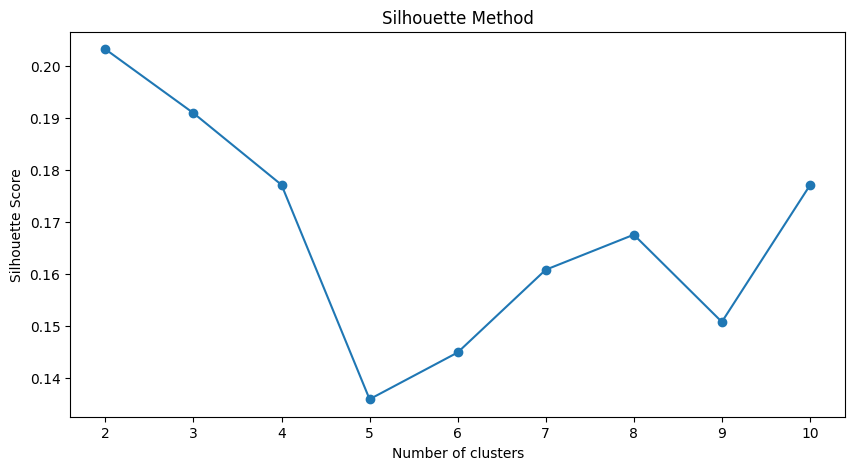

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Manually calculate and visualize the Elbow method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

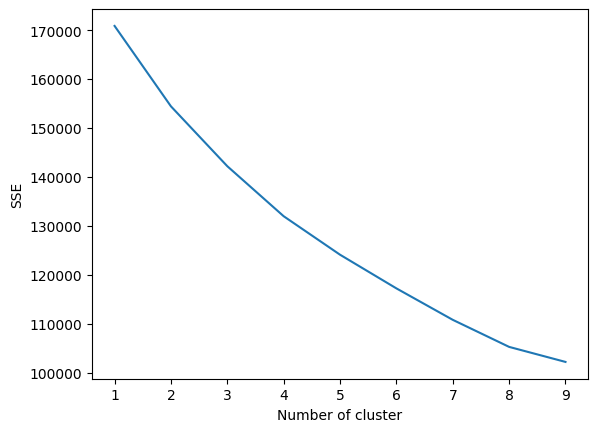

In [30]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df4)
    df4["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Use "Yellowbrick" to visualize Silhouette score and Elbow method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


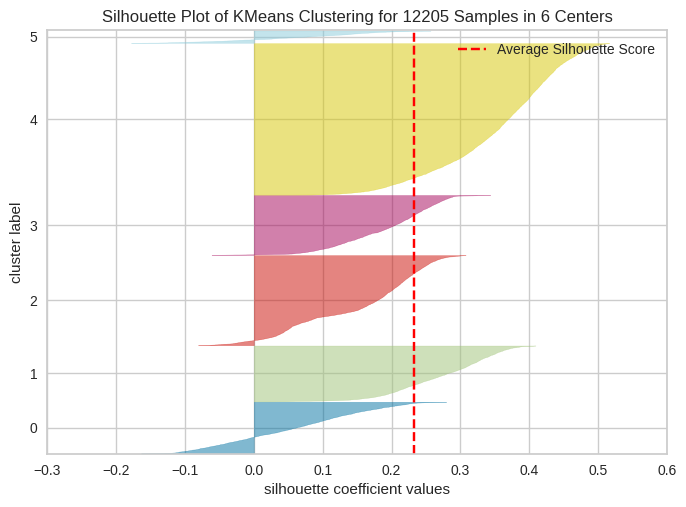

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 12205 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick', k = (2,10))

visualizer.fit(df4)        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

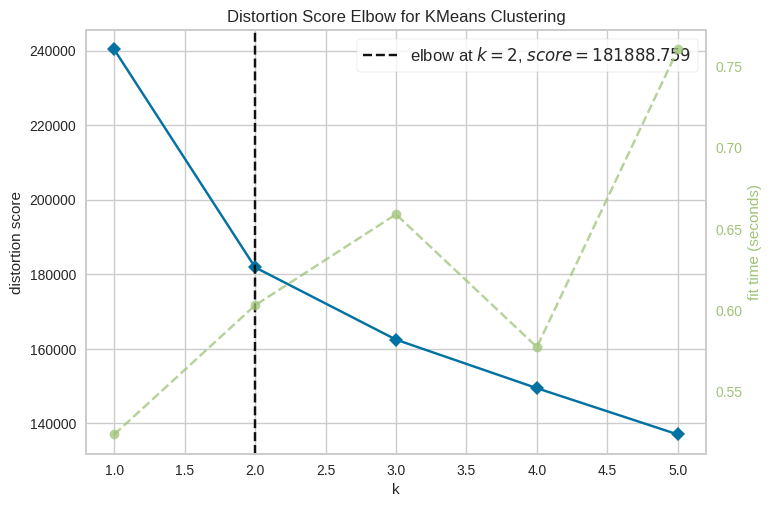

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6))
visualizer.fit(df4)        # Fit the data to the visualizer
visualizer.show()

In [54]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Example: 5 clusters
pipeline = Pipeline(steps=[('clusterer', kmeans)])

# Fit the pipeline
pipeline.fit(df4)

# Access cluster labels
cluster_labels = pipeline.named_steps['clusterer'].labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
df4['cluster'] = cluster_labels
# pca_model = pipeline.named_steps['pca']
# pca_components = pipeline.named_steps['pca'].transform(preprocessor.transform(df4.drop('cluster', axis=1)))
# explained_variance_ratio = pca_model.explained_variance_ratio_
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# pca_components = pca_model.components_
# pca_df1 = pd.DataFrame(data=pca_model.transform(preprocessor.transform(df4.drop('cluster', axis=1))),
#                       columns=[f'PC{i+1}' for i in range(pca_model.n_components_)])
# pca_df1['cluster'] = cluster_labels

In [64]:
# pca_df1
df4.head()

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,clusters,cluster
0,-0.702302,-0.460019,-0.246257,-0.628793,3.434394,-0.318962,-0.31024,-1.334491,-1.239776,-0.794017,-0.896370,-0.765321,0.40967,-0.553088,2,1
1,-0.702302,-0.460019,-0.246257,-0.595451,1.268054,-0.318962,-0.31024,-1.334491,-0.136980,-0.209237,-0.896370,-0.516347,0.40967,-0.553088,0,1
2,-0.702302,-0.460019,-0.246257,-0.628793,3.434394,-0.318962,-0.31024,-1.334491,2.068612,-0.794017,2.433853,-0.267374,0.40967,-0.553088,2,1
3,-0.702302,-0.460019,-0.246257,-0.627404,2.134590,-0.318962,-0.31024,-1.334491,0.965816,-0.209237,-0.480092,-0.018400,0.40967,-0.553088,2,1
4,-0.702302,-0.460019,-0.246257,-0.301889,0.184884,-0.318962,-0.31024,-1.334491,0.965816,0.375543,-0.896370,-0.018400,0.40967,1.808031,3,0


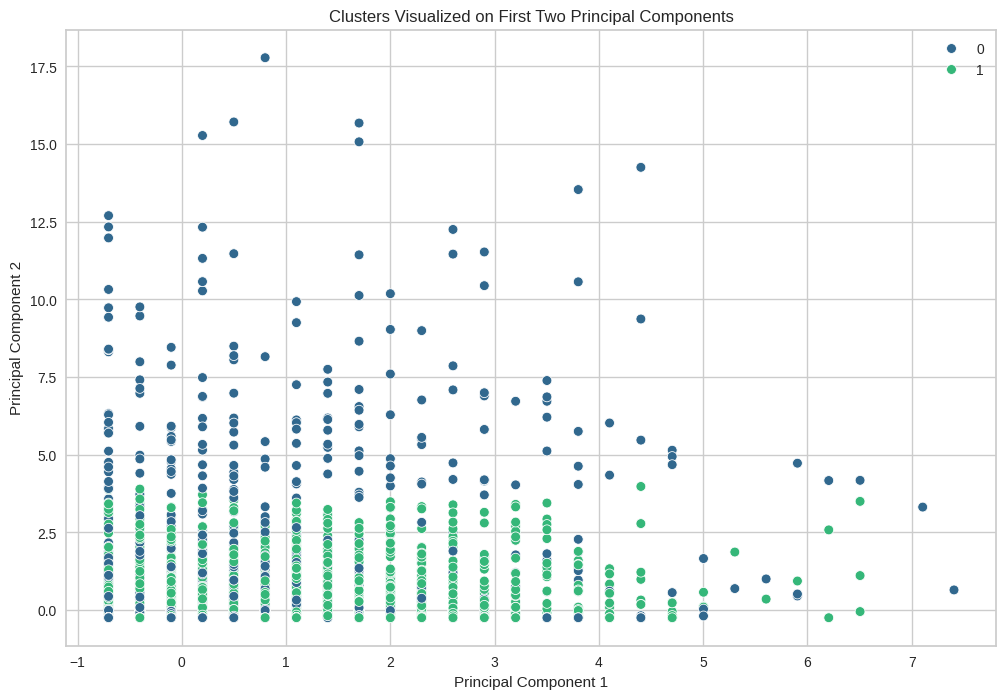

In [65]:
# Plotting the first two principal components
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Administrative", y="Informational_Duration", hue='cluster', data=df4, palette='viridis', s=50)
plt.title('Clusters Visualized on First Two Features')
plt.xlabel('Administrative')
plt.ylabel('Informational_Duration')
plt.legend()
plt.show()



In [83]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.shape

(12205, 18)

In [86]:
df4.cluster.value_counts()
# df4.shape

cluster
1    6704
0    5501
Name: count, dtype: int64